In [1]:
from scipy.integrate import ode, solve_ivp
import os, sys, time
import numpy as np
import matplotlib.pyplot as plt
import pickle
import bisect

sys.path.append('../')
from simulator_myokit import Simulator

In [2]:
sys.path.append('../Protocols')
from protocols import optimized_VC_Christini
'''
Kernik 2019 with Christini-VC
'''
model_path = "../mmt-model-files/kernik-2019_VC.mmt" 
sim_params = {
    'cell.mode': 1,            # 'Endocardial' : 0,    'Epicardial' : 1,    'Mid-myocardial' : 2,
    
    'ina.g_Na' : 9.720613409241,       # 9.720613409241 [nS/pF]    
    'ito.g_to' : 0.1178333333333,      # 0.1178333333333 [nS/pF]
    'ical.p_CaL' : 0.308027691379,     # 0.308027691379 [L/s/F]
    'ikr.g_Kr' : 0.218025,             # 0.218025 [nS/pF]
    'iks.g_Ks' : 0.0077,               # 0.0077 [nS/pF]
    'ik1.g_K1' : 0.133785777797606,    # 0.133785777797606 [nS/pF]
    'ifunny.g_f' : 0.0435              # 0.0435
} 
I_li = ['ina.i_Na', 'ito.i_to', 'ical.i_CaL', 'ikr.i_Kr', 'iks.i_Ks', 'ik1.i_K1', 'ifunny.i_f']  

start_time = time.time()
simulator = Simulator(model_path, optimized_VC_Christini, pre_sim=2) 
simulator.name = "Kernik 2019"
# Gs = [simulator.model.get(G).value() for G in G_li]
# print(Gs)
times = np.arange(0, simulator.protocol_total_duration, 1)# np.linspace(0, simulator.total_duration, 20000)  
# simulator.set_simulation_params(sim_params)
d = simulator.simulate(times, extra_log=I_li)        
print("--- %s seconds ---"%(time.time()-start_time))

D:\share\Electrophysiology\Simulation_Myokit\Protocols\trial_steps_ramps_Kernik_200_50_4_-120_60/shortened_trial_steps_ramps_Kernik_200_50_4_-120_60_500_artefact_True_short.pkl
The protocol is 9055.950603217367 ms
--- 14.227556705474854 seconds ---


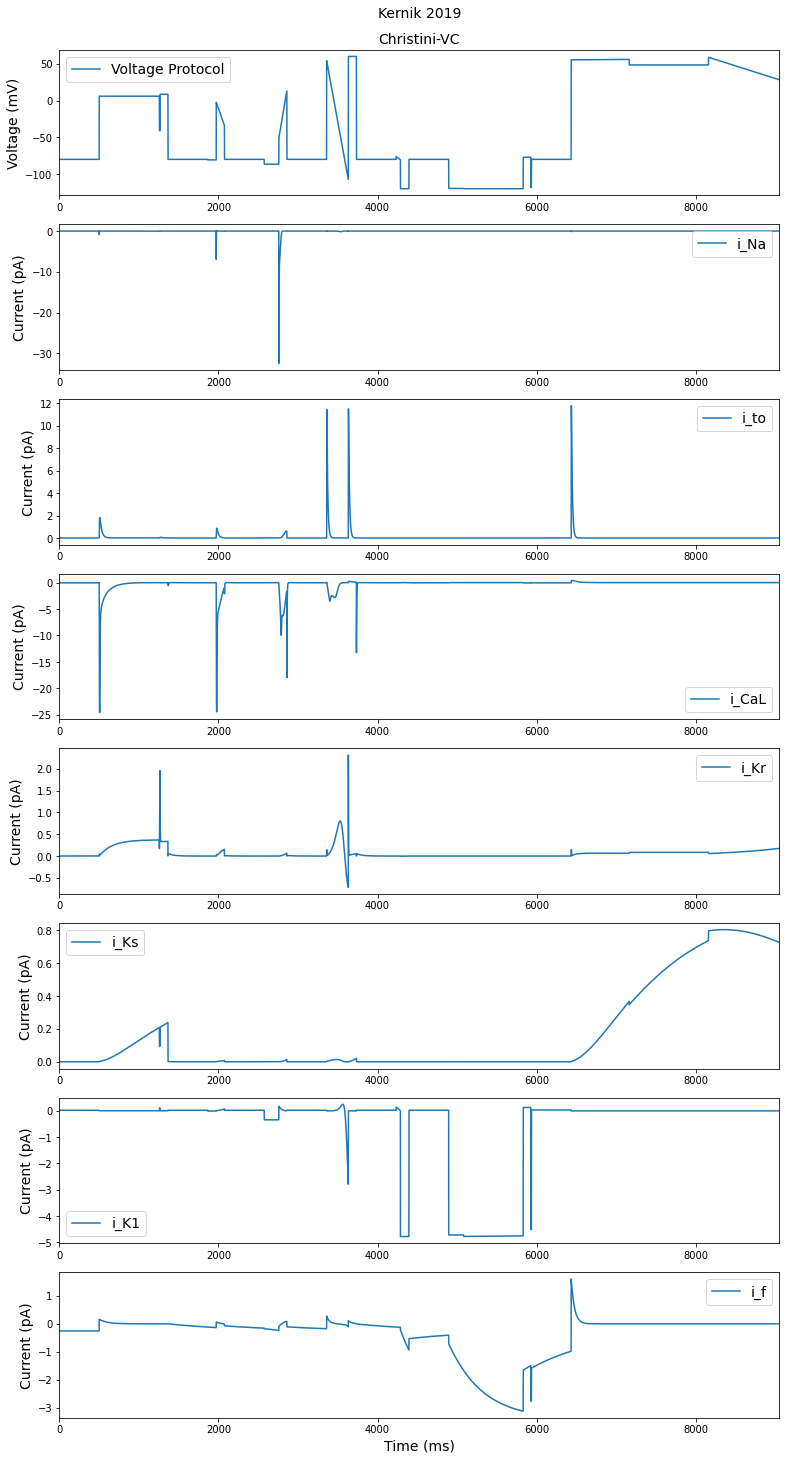

Complete


In [3]:
fig, axes = plt.subplots(len(I_li)+1,1, figsize=(10, 20))
fig.suptitle(simulator.name, fontsize=14)
axes[0].set_title("Christini-VC", fontsize=14)
axes[0].set_xlim(0, d['engine.time'][-1])
axes[0].set_ylabel("Voltage (mV)", fontsize=14)
axes[0].plot(d['engine.time'], d['membrane.V'], label="Voltage Protocol")
# textstr = "GNa : %1.4f\nGNaL : %1.4f\nGto : %1.4f\nPCa : %1.4f\nGKr : %1.4f\nGKs : %1.4f\nGK1 : %1.4f\nGf : %1.4f"%(Gs[0], Gs[1], Gs[2], Gs[3], Gs[4], Gs[5], Gs[6], Gs[7])
# props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
# axes[0].text(0.67, 0.60, textstr, transform=axs[0].transAxes, fontsize=14, verticalalignment='top', bbox=props)    
axes[0].legend(fontsize=14)
axes[0].xaxis.set_visible(True)

for i, I in enumerate(I_li):    
    axes[i+1].set_xlim(0, d['engine.time'][-1])
    axes[i+1].set_ylabel("Current (pA)", fontsize=14)
    axes[i+1].plot(d['engine.time'], d[I], label=I.split('.')[1])
    axes[i+1].legend(fontsize=14) 
axes[-1].set_xlabel("Time (ms)", fontsize=14)
plt.subplots_adjust(left=0.0, bottom=0.0, right=1.0, top=0.95, wspace=0.5, hspace=0.2)
# fig.tight_layout()#rect=[0.5, 0.5, 0.5, 0.5]
plt.show()
fig.savefig(os.path.join('VC_results', 'Kernik2019_with_Christini-VC'), dpi=100)
print("Complete")